<center>
    <h1 style="background-color:blueviolet;color:white; font-size:40px; font-waight:bold; font-family:Times New Roman; border:2px solid black;">TASK-1  TITANIC SURVIVAL PREDICTION  </h1>


In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       244
                                                                                 False  False        87
                                             True   False  False  False   False  True   False        82
                                                                                 False  False         4
                                             False  False  False  False   True   True   False         1
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Survived', ylabel='count'>

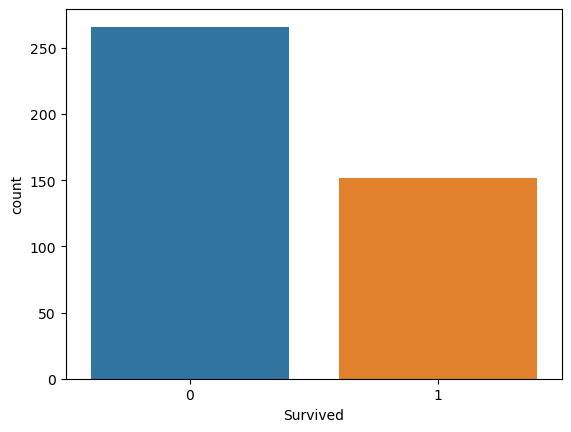

In [10]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

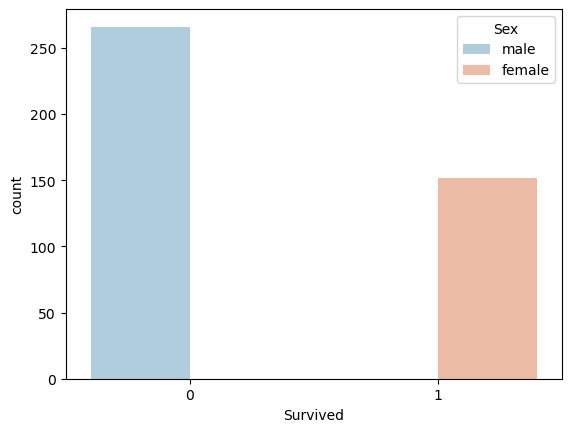

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

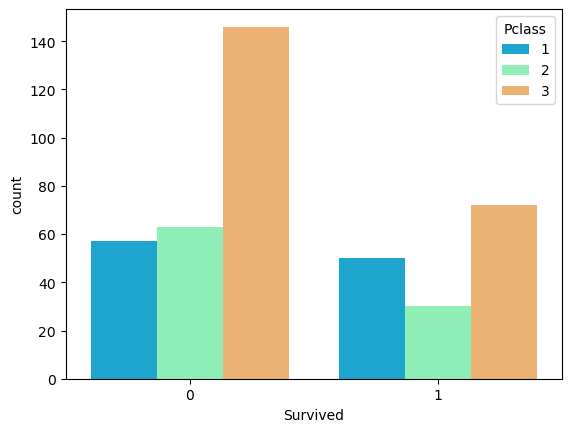

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:>

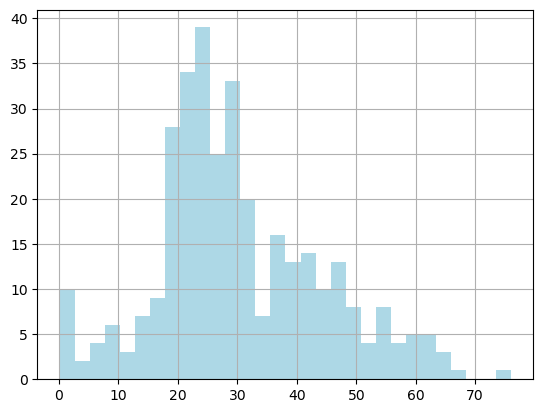

In [13]:
df['Age'].hist(bins=30,color='lightblue')

<AxesSubplot:>

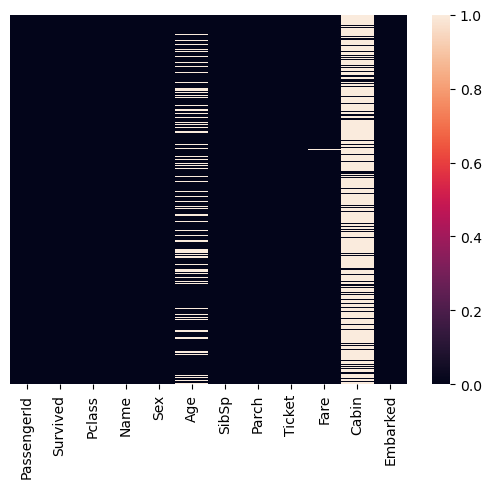

In [14]:
sns.heatmap(df.isnull(),yticklabels=False)

Age data is important so we can't drop it,so we will fill it on the other hand. Cabin data will be drop and fare have only one null value so we will think after Age and Cabin Columns.
There is a relationship between Pclass and age so we have to check

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

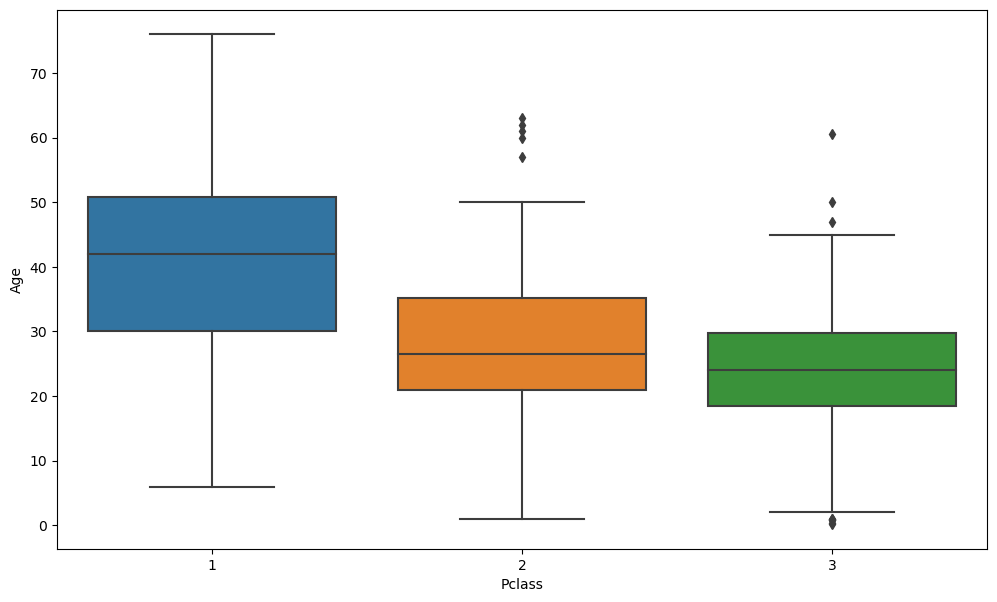

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [16]:
# in the box plot every Pclass have age mean 
df.loc[(df['Pclass'] == 1) & (df['Age'].isnull()), 'Age'] = 37
df.loc[(df['Pclass'] == 2) & (df['Age'].isnull()), 'Age'] = 29
df.loc[(df['Pclass'] == 3) & (df['Age'].isnull()), 'Age'] = 24

In [17]:
df=df.drop(columns='Cabin')

In [18]:
df=df.dropna()

<AxesSubplot:>

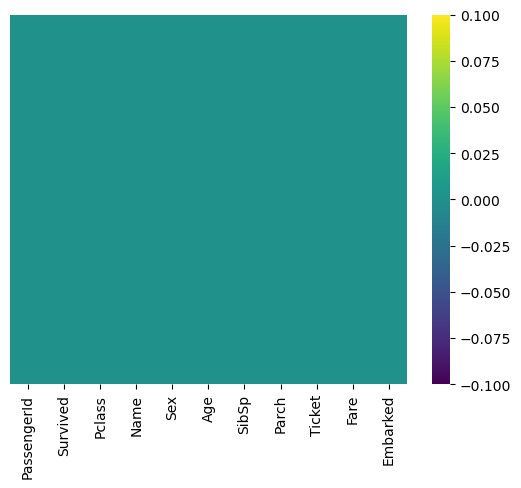

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

### Dataset does not have null values

In [20]:
#change float to integer
df['Age'] = df['Age'].astype(int)

In [21]:
df['Fare'] = df['Fare'].astype(int)

In [22]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Embarked       object
dtype: object

In [23]:
# change object data type to int
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)

In [24]:
df['Sex'] = df['Sex'].map({'male':0,'female':1}).astype(int)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,0
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,1


In [26]:
#drop columns which are not required
data = df.drop(['PassengerId','Name','Ticket'], axis =1, inplace=True)

Data is clean now,we are going to make the model 

In [27]:
#model DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
x= df.drop(['Survived'],axis=1)
y= df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import accuracy_score
#prediction on test data
y_pred = clf.predict(x_test)
#calculation
acc = accuracy_score(y_test,y_pred)
print('Accuracy:', acc)

Accuracy: 1.0


### End